In [5]:
import geopandas
import osm2geojson

Let's see different Python libraries to get data from OSM. As example we're goint to get data of Lighthouses in Galician area.

## Overpass
Simple Python wrapper by Martijn van Exel  
[https://github.com/mvexel/overpass-api-python-wrapper](https://github.com/mvexel/overpass-api-python-wrapper)

In [6]:
import overpass

In [7]:
api = overpass.API()
faros = api.get("""
area[name = "Galicia"];
node["man_made" = "lighthouse"](area);
out body;""", responseformat="geojson")

In [8]:
farosData= geopandas.GeoDataFrame.from_features(faros.features)

In [9]:
farosData.head()

,geometry,description,height,man_made,name,seamark:light:character,seamark:light:colour,seamark:light:height,seamark:light:period,seamark:light:range,...,seamark:light:2:category,seamark:light:3:category,seamark:beacon_special_purpose:colour,seamark:beacon_special_purpose:elevation,seamark:beacon_special_purpose:shape,heritage:operator,historic,seamark:light:2:orientation,colour,note
0,POINT (-8.99052 43.27492),El nombre de Roncudo viene del ruido ronco que...,11,lighthouse,Faro Roncudo,Fl,white,38,6,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (-8.80110 42.39662),NaN,NaN,lighthouse,NaN,Fl,red,8,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-8.31454 43.56765),NaN,NaN,lighthouse,Cabo Prior,Fl,white,107,15,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (-8.18836 43.61807),NaN,NaN,lighthouse,Faro de Punta Frouxeira,Fl,white,75,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (-8.04710 43.71083),NaN,NaN,lighthouse,Punta Candieira,Fl,white,89,24,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


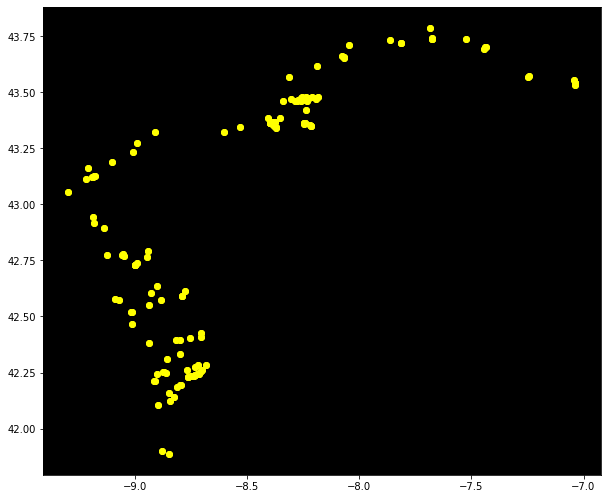

In [19]:
plt = farosData.plot(color="yellow", figsize=(10, 10))
plt.set_facecolor('black')

## Osmpy

In [21]:
import osmpy
from shapely import wkt

In [22]:
osmpy.list_queries()

,name,docstring
0,Amenities,Location of amenities within a boundary
1,AmentiesCount,Number of amenities per type within a boundary
2,POIs,Location of Points of Interest within a bound...
3,RoadLength,Length of road by roadtype within a boundary


In [23]:
boundary = wkt.loads('POLYGON((-46.63 -23.54,-46.6 -23.54,-46.62 -23.55,-46.63 -23.55,-46.63 -23.54))')


In [24]:
query = ("""
[out:json];
area[name = "Galicia"];
node["man_made" = "lighthouse"](area);
out body;""")
result = osmpy.get(query, boundary)

In [25]:
print(result)

     type          id        lat       lon  \
0    node   278605200  43.274918 -8.990517   
1    node   279464803  42.396617 -8.801095   
2    node   353954167  43.567646 -8.314544   
3    node   364101774  43.618068 -8.188365   
4    node   388517872  43.710833 -8.047095   
..    ...         ...        ...       ...   
145  node  6906203760  42.590992 -8.790904   
146  node  6916517715  42.333545 -8.798352   
147  node  6967184339  42.234387 -8.744538   
148  node  7981210881  43.127454 -9.182165   
149  node  8665999327  42.728715 -9.000917   

                                                  tags  
0    {'description': 'El nombre de Roncudo viene de...  
1    {'man_made': 'lighthouse', 'seamark:light:char...  
2    {'man_made': 'lighthouse', 'name': 'Cabo Prior...  
3    {'man_made': 'lighthouse', 'name': 'Faro de Pu...  
4    {'alt_name': 'Punta Candeeira', 'man_made': 'l...  
..                                                 ...  
145  {'man_made': 'lighthouse', 'seamark:type': 

In [26]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(result['lon'], result['lat'])]
from geopandas import GeoDataFrame
gdf = GeoDataFrame(result, geometry=geometry)
gdf.head()

,type,id,lat,lon,tags,geometry
0,node,278605200,43.274918,-8.990517,{'description': 'El nombre de Roncudo viene de...,POINT (-8.99052 43.27492)
1,node,279464803,42.396617,-8.801095,"{'man_made': 'lighthouse', 'seamark:light:char...",POINT (-8.80109 42.39662)
2,node,353954167,43.567646,-8.314544,"{'man_made': 'lighthouse', 'name': 'Cabo Prior...",POINT (-8.31454 43.56765)
3,node,364101774,43.618068,-8.188365,"{'man_made': 'lighthouse', 'name': 'Faro de Pu...",POINT (-8.18836 43.61807)
4,node,388517872,43.710833,-8.047095,"{'alt_name': 'Punta Candeeira', 'man_made': 'l...",POINT (-8.04709 43.71083)


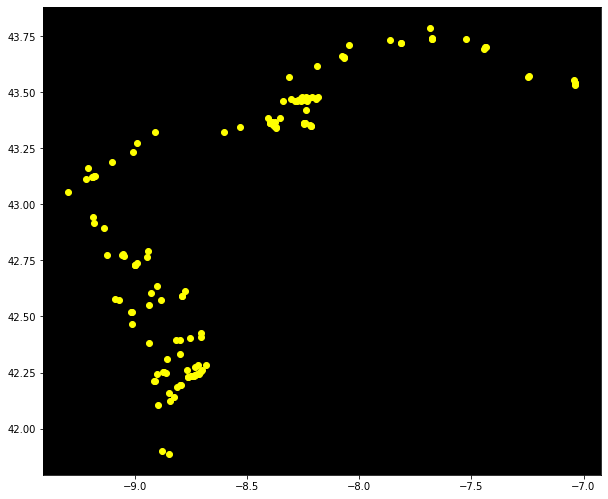

In [27]:
plt = gdf.plot(color="yellow", figsize=(10, 10))
plt.set_facecolor('black')

## OSMPythonTools

In [35]:
from OSMPythonTools.overpass import Overpass
overpass = Overpass()

In [2]:
result = overpass.query('way["name"="Stephansdom"]; out body;')

[overpass] downloading data: [timeout:25][out:json];way["name"="Stephansdom"]; out body;


Exception: [overpass] could not fetch or interpret status of the endpoint

In [2]:
import platform
print(platform.python_version())

3.10.4


In [4]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=349036, elementType=['node'], selector='"man_made"="lighthouse"', includeGeometry=True)
result = overpass.query(query)

[overpass] downloading data: [timeout:25][out:json];area(349036)->.searchArea;(node["man_made"="lighthouse"](area.searchArea);); out body geom;


Exception: [overpass] could not fetch or interpret status of the endpoint

In [44]:
overpass = Overpass()
result = overpass.query("""
area[name = "Galicia"];
node["man_made" = "lighthouse"](area);
out body;""")

[overpass] downloading data: [timeout:25][out:json];
area[name = "Galicia"];
node["man_made" = "lighthouse"](area);
out body;


Exception: [overpass] could not fetch or interpret status of the endpoint

In [161]:
geojson = osm2geojson.json2geojson(result.toJSON())
faros = geopandas.GeoDataFrame.from_features(geojson)
faros.head()

,geometry,type,id,tags
0,POINT (-8.99052 43.27492),node,278605200,{'description': 'El nombre de Roncudo viene de...
1,POINT (-8.80109 42.39662),node,279464803,"{'man_made': 'lighthouse', 'seamark:light:char..."
2,POINT (-8.31454 43.56765),node,353954167,"{'man_made': 'lighthouse', 'name': 'Cabo Prior..."
3,POINT (-8.18836 43.61807),node,364101774,"{'man_made': 'lighthouse', 'name': 'Faro de Pu..."
4,POINT (-8.04709 43.71083),node,388517872,"{'alt_name': 'Punta Candeeira', 'man_made': 'l..."


In [28]:
plt = faros.plot(color="yellow", figsize=(10, 10))
plt.set_facecolor('black')

AttributeError: plot